# Coupling to Ideal Loads
In this notebook, we investigate the WEST ICRH antenna behaviour when the front-face is considered as an ideal load made of independant impedances.  

In [3]:
%matplotlib notebook

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
# WEST ICRH Antenna package
import sys; sys.path.append('..')
from west_ic_antenna import WestIcrhAntenna

## Front Face Electrical Model

## Strap Reactance Frequency Fit
The antenna straps having a given length, their reactance is non zero. Let's look to the strap reactances from the realistic antenna model in vacuum and facing the water tank (aka the "aquarium"):

In [163]:
# HFSS simulation of the antenna front-face radiating in WEST empty chamber (vacuum)
file_vacuum = '../west_ic_antenna/data/Sparameters/front_faces/WEST_ICRH_antenna_front_face_curved_30to70MHz.s4p'
ntw_vacuum = rf.Network(file_vacuum)

# HFSS simulation of the antenna front-face direclty facing the water tank
file_aquarium = '../west_ic_antenna/data/Sparameters/front_faces/aquarium/WEST_ICRH_front_face_with_aquarium_Daq00cm.s4p'
ntw_aquarium = rf.Network(file_aquarium)

Let's plot the front-face resistance R_s ($X_s=\Im(Z)$) and reactance ($X_s=\Im(Z)$) of each port for each cases:

<IPython.core.display.Javascript object>


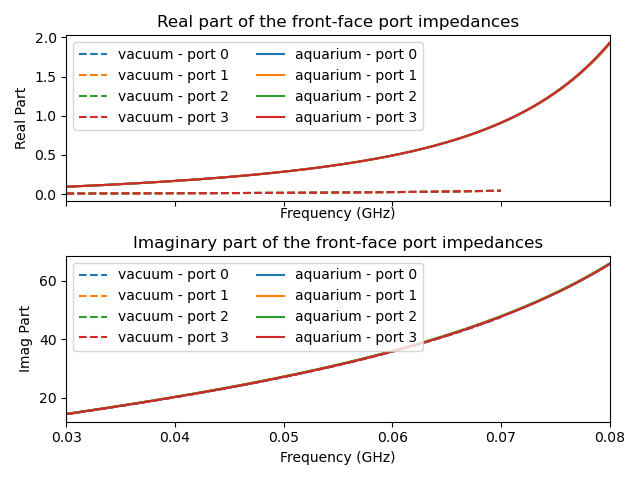

In [164]:
fig, ax = plt.subplots(2, 1, sharex=True)
# real parts
[ntw_vacuum.plot_z_re(m=idx, n=idx, ax=ax[0], ls='--', color=f'C{idx}',
                      label=f'vacuum - port {idx}') for idx in range(4)]
[ntw_aquarium.plot_z_re(m=idx, n=idx, ax=ax[0], color=f'C{idx}',
                        label=f'aquarium - port {idx}') for idx in range(4)]
ax[0].set_title('Real part of the front-face port impedances')
# imag parts
[ntw_vacuum.plot_z_im(m=idx, n=idx, ax=ax[1], ls='--', color=f'C{idx}',
                      label=f'vacuum - port {idx}') for idx in range(4)]
[ntw_aquarium.plot_z_im(m=idx, n=idx, ax=ax[1], color=f'C{idx}',
                        label=f'aquarium - port {idx}') for idx in range(4)]
ax[1].set_title('Imaginary part of the front-face port impedances')
fig.tight_layout()
[a.legend(ncol=2) for a in ax]

As one can see, while the resistance of the front-face's ports obviously depend of the coupling conditions, the reactance is almost independant of the coupling conditions and only depends of the frequency. 

Hence, one can fit the strap reactance with frequency only:

In [39]:
from numpy import polyfit, polyval

In [127]:
# polynomial fit of the strap reactance
coeffs = polyfit(ntw_vacuum.frequency.f/1e6, 
                 ntw_vacuum.z_im[:,0,0], 
                 deg=3)
print(coeffs)

[ 1.65682345e-04 -1.52541615e-02  1.04388949e+00 -7.76846926e+00]


The strap reactance can be approximated by the following formula:

$$
X_s(f_{\mathrm{MHz}}) 
= 
1.66\times 10^{-4} f_{\mathrm{MHz}}^3 
-1.53\times 10^{-2} f_{\mathrm{MHz}}^2 
+ 1.04 f_{\mathrm{MHz}}
-7.77
$$

In [131]:
def Xs(f_MHz):
    """
    Strap Reactance [Ohm] for a given frequency in MHz
    """
    return 1.66e-04*f_MHz**3 -1.53e-02*f_MHz**2 + 1.04*f_MHz -7.77

<IPython.core.display.Javascript object>


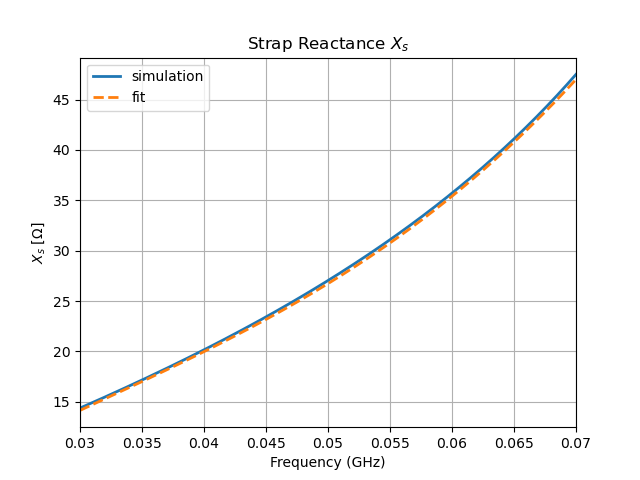

Text(0, 0.5, '$X_s$ [$\\Omega$]')

In [132]:
fig, ax = plt.subplots()
ntw_vacuum.plot_z_im(m=0, n=0, ax=ax, lw=2, label='simulation')
ax.plot(ntw_vacuum.frequency.f, Xs(ntw_vacuum.frequency.f/1e6), 
        lw=2, ls='--', label='fit')
ax.set_xlim(30e6, 70e6)
ax.legend()
ax.grid(True)
ax.set_title('Strap Reactance $X_s$')
ax.set_ylabel('$X_s$ [$\Omega$]')

In [2]:
from IPython.core.display import HTML
def _set_css_style(css_file_path):
    """
    Read the custom CSS file and load it into Jupyter
    Pass the file path to the CSS file
    """
    styles = open(css_file_path, "r").read()
    s = '<style>%s</style>' % styles
    return HTML(s)

_set_css_style('custom.css')